In [1]:
#All Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os
import logging

ModuleNotFoundError: No module named 'seaborn'

INFO:root:Dataset Info:
INFO:root:Missing Values:
INFO:root:MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
INFO:root:Summary Statistics:
INFO:root:             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


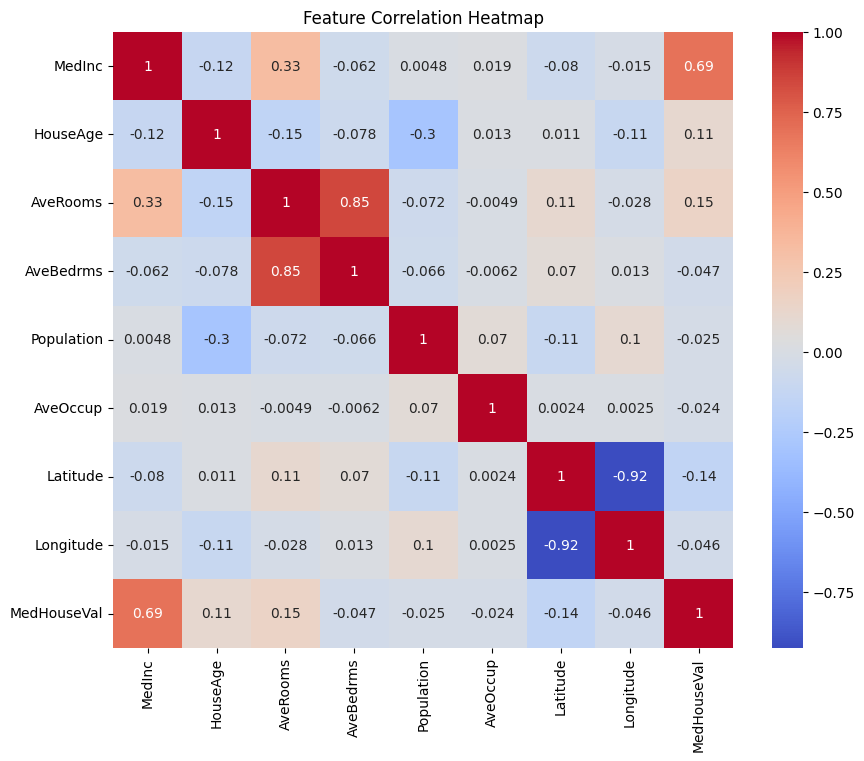

In [2]:
#Data preprocessing

# Configure logging
logging.basicConfig(level=logging.INFO)

# Data Preprocessing

# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display basic info
logging.info("Dataset Info:")
df.info()

# Check for missing values
logging.info("Missing Values:")
logging.info(df.isnull().sum())

# Summary statistics
logging.info("Summary Statistics:")
logging.info(df.describe())

# Handle missing values
imputer = SimpleImputer(strategy='median')
df.iloc[:, :] = imputer.fit_transform(df)

# Scale numeric features
scaler = StandardScaler()
df.iloc[:, :] = scaler.fit_transform(df)

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Select features and target
X = df.drop(columns=['MedHouseVal'], errors='ignore')
y = df['MedHouseVal']

In [4]:
#Model training
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning(GridSearchCV)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)

ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)

logging.info("Best Ridge Parameters: %s", ridge_cv.best_params_)
logging.info("Best Lasso Parameters: %s", lasso_cv.best_params_)

# Saving best models
joblib.dump(ridge_cv.best_estimator_, 'ridge_model.pkl')
joblib.dump(lasso_cv.best_estimator_, 'lasso_model.pkl')

logging.info("Data Preprocessing and Model Training completed.")

INFO:root:Best Ridge Parameters: {'alpha': 0.1}
INFO:root:Best Lasso Parameters: {'alpha': 0.01}
INFO:root:Data Preprocessing and Model Training completed.


In [ ]:
#API
import fastapi
from fastapi import FastAPI, HTTPException, Form
from pydantic import BaseModel
import uvicorn
from starlette.responses import HTMLResponse
from fastapi.templating import Jinja2Templates
from fastapi.requests import Request
import asyncio
import nest_asyncio

# Configure logging
logging.basicConfig(level=logging.INFO)
# Data Preprocessing
logging.info("Loading dataset...")
data = fetch_california_housing(as_frame=True)
df = data.frame
#California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# basic info
logging.info("Dataset Info:")
df.info()

# Checking missing values 
logging.info("Missing Values:")
logging.info(df.isnull().sum())

# statistical details
logging.info("Summary Statistics:")
logging.info(df.describe())

# missing values handeling
imputer = SimpleImputer(strategy='median')
df.iloc[:, :] = imputer.fit_transform(df)

# numeric feature scaling
scaler = StandardScaler()
df.iloc[:, :] = scaler.fit_transform(df)

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Selecting features and target
X = df.drop(columns=['MedHouseVal'], errors='ignore')
y = df['MedHouseVal']

#  Model Training & Evaluation

#  training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning(GridSearchCV)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)

ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)

logging.info("Best Ridge Parameters: %s", ridge_cv.best_params_)
logging.info("Best Lasso Parameters: %s", lasso_cv.best_params_)

# Save best models
joblib.dump(ridge_cv.best_estimator_, 'ridge_model.pkl')
joblib.dump(lasso_cv.best_estimator_, 'lasso_model.pkl')

logging.info("Data Preprocessing and Model Training completed.")

#FastAPI for Predictions
app = FastAPI()
templates = Jinja2Templates(directory="templates")

# Load the trained model
ridge_model = joblib.load('ridge_model.pkl')

class PredictionInput(BaseModel):
    features: list[float]

@app.get("/", response_class=HTMLResponse)
def home(request: Request):
    return templates.TemplateResponse("index.html", {"request": request})

@app.post("/predict")
def predict(features: PredictionInput):
    try:
        input_array = np.array(features.features).reshape(1, -1)
        prediction = ridge_model.predict(input_array)
        return {"predicted_price": round(prediction[0], 2)}
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

if __name__ == "__main__":
   nest_asyncio.apply()
uvicorn.run(app, host="0.0.0.0", port=8000)

House Price Prediction - DECCAN.AI Task

1. Introduction
Welcome! This project is part of the DECCAN.AI Machine Learning Engineer assessment. The goal is to build and deploy a model that predicts house prices based on various features like location, size, and amenities. By the end of this, you'll have a working ML model wrapped in an API, ready to take in house details and give back price predictions!

2. Data Preprocessing
To make our model accurate, we need to clean and prepare the data properly. Here's what we'll do:
- Load a publicly available dataset (like Kaggle's House Price Dataset or the California Housing Dataset).
- Handle missing values so our model isn't working with incomplete information.
- Scale and encode features to ensure consistency.
- Explore the data using visualizations to understand relationships between different factors.

3. Model Training & Evaluation
Once our data is ready, it's time to train the model. We'll:
- Split the data into training and test sets (usually 80% training, 20% testing).
- Train multiple regression models, including:
  - Linear Regression
  - Decision Tree
  - Random Forest
  - XGBoost
- Evaluate performance using key metrics like:
  - Root Mean Squared Error (RMSE)
  - Mean Absolute Error (MAE)
  - R² Score (how well the model explains the variation in prices)
- Fine-tune the best model using GridSearchCV or RandomizedSearchCV.
- Save the best-performing model using Pickle or Joblib so we can use it later.

 4. Model Deployment
Now that we have a trained model, we need to make it accessible. We'll:
- Build a REST API using Flask or FastAPI.
- Create an endpoint `/predict` where users can send house details as JSON and get price predictions in return.
- Test the API using Postman or CURL to ensure it works as expected.

7. Conclusion
That’s it! We built, trained, optimized, and deployed a machine learning model to predict house prices. We also explored Dockerization to make deployment smoother. Possible improvements include integrating more advanced models, deploying on cloud platforms like AWS, and adding a user-friendly frontend. 



